# Hierarchical Clustering

### **Step 0: Import packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### **Step 1: Load data**

In [2]:
dataset = pd.read_csv('data/Mall_Customers.csv')
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


The thing about unsupervised learning is that, we don't really have actual labels available for comparision.

Therefore, we don't have y.

In [3]:
# Since we would like to visualize the result on the 2d plane,
# we choose the 2 most seemingly important columns for clustering:
x = dataset.iloc[:,[-2,-1]].values

In [4]:
# print(x)

### **Step 2: Find the optimal #clusters**

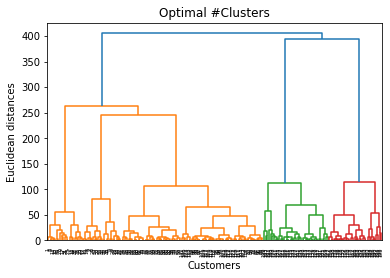

In [5]:
dend = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Optimal #Clusters')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

As shown in the dendrogram, the optimal #clusters is obviously 5.

### **Step 3: Fit model**

In [6]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred = hc.fit_predict(x)

### **Step 4: Visualization**

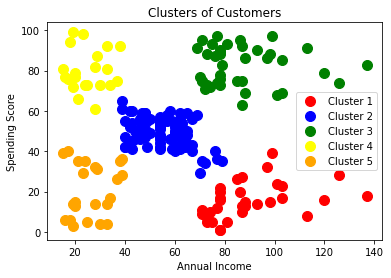

In [7]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='red',   label='Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='blue',  label='Cluster 2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c='green', label='Cluster 3')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=100,c='yellow',label='Cluster 4')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],s=100,c='orange',label='Cluster 5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()